### Linear Regression ###

Equation of the linear regresion: Y = mX + b
Y: represents the dependent variable
X: represents the independent variable
m is the slope of the line (how much y changes for a unit change in x).
b is the intercept (the value of Y when X is 0)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("homeprices.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


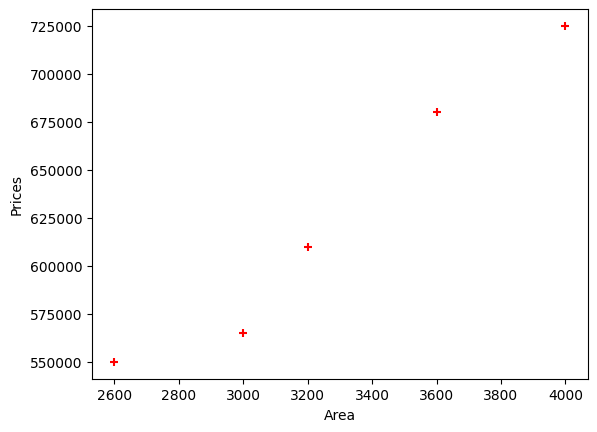

In [3]:
%matplotlib inline
plt.xlabel("Area")
plt.ylabel("Prices")
plt.scatter(df.area, df.price, color='red', marker='+')

In [4]:
new_df = df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
model = LinearRegression()
model.fit(new_df, df.price)

LinearRegression()

In [6]:
model.predict([[5000]])

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [7]:
model.coef_

array([135.78767123])

In [8]:
model.intercept_

180616.43835616432

In [9]:
#y = m*x + b
135.78767123*5000 + 180616.43835616432

859554.7945061643

## Exercise ##
Predict canada's per capita income in year 2020. you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [10]:
data = pd.read_csv("canada_per_capita_income.csv")
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [11]:
new_data = data.drop('year', axis='columns')
new_data.head()

,per capita income (US$)
0,3399.299037
1,3768.297935
2,4251.175484
3,4804.463248
4,5576.514583


In [12]:
model = LinearRegression()
model.fit(new_data, data.year)

LinearRegression()

In [13]:
predicted_income_2020 = model.predict([[2020]])
print("Predicted per capita income for Canada in 2020 is:", predicted_income_2020)

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted per capita income for Canada in 2020 is: [1974.82588684]


In [14]:
model.coef_

array([0.00107538])

In [15]:
model.intercept_

1972.6536140098344

In [16]:
0.00107538*2020 + 1972.6536140098344

1974.8258816098344

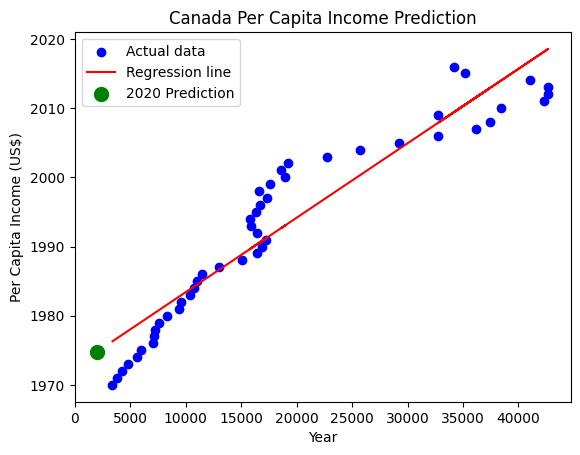

In [17]:
# Plot the data points
plt.scatter(new_data, data.year, color='blue', label='Actual data')
# Plot the regression line
plt.plot(new_data, model.predict(new_data), color='red', label='Regression line')
# Highlight the prediction
plt.scatter([2020], predicted_income_2020, color='green', marker='o', s=100, label='2020 Prediction')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Canada Per Capita Income Prediction')
plt.legend()
plt.show()

### Example 1: Predicting House Prices

In this example, we’ll predict house prices based on multiple features like number of rooms, square footage, and distance to city center.

#### Code Implementation

Mean Squared Error: 9256523.538778815
R2 Score: 0.9954288772648006


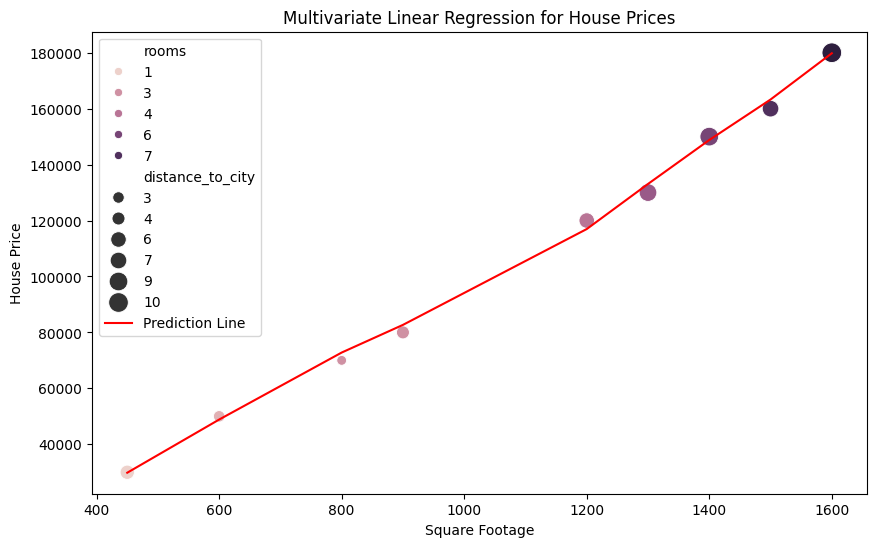

In [18]:
# Example dataset
data = {
    'rooms': [1, 2, 3, 3, 4, 5, 6, 7, 8],
    'square_footage': [450, 600, 800, 900, 1200, 1300, 1400, 1500, 1600],
    'distance_to_city': [5, 3, 2, 4, 6, 8, 9, 7, 10],
    'price': [30000, 50000, 70000, 80000, 120000, 130000, 150000, 160000, 180000]
}
df = pd.DataFrame(data)

# Splitting data into training and test sets
X = df[['rooms', 'square_footage', 'distance_to_city']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='square_footage', y='price', hue='rooms', size='distance_to_city', sizes=(50, 200))
plt.plot(df['square_footage'], model.predict(X), color='red', label='Prediction Line')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.legend()
plt.title("Multivariate Linear Regression for House Prices")
plt.show()

### Multivariate Linear Regression

**Multivariate Linear Regression** is an extension of simple linear regression, where multiple independent variables (predictors) are used to predict a dependent variable (response). This model is used when there is more than one predictor influencing the outcome.

**General Equation**:
For \( n \) features, the multivariate linear regression model is expressed as:
\[
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
\]
Where:
- \( y \) = dependent variable
- \( x_1, x_2, ..., x_n \) = independent variables
- \( \beta_0 \) = intercept
- \( \beta_1, \beta_2, ..., \beta_n \) = coefficients for each independent variable
- \( \epsilon \) = error term

### Why Use Multivariate Linear Regression?

Multivariate regression allows us to:
1. **Understand relationships**: Identify how multiple factors influence the outcome.
2. **Improve predictions**: Including more features can increase predictive accuracy.
3. **Control for confounding variables**: Assess individual impact by accounting for other variables.

### Pros and Cons

#### Pros
- **Interpretability**: Model coefficients provide insight into each variable’s influence.
- **Efficiency**: Easy to implement with standard statistical packages.
- **Predictive power**: Multiple predictors often lead to better predictions.

#### Cons
- **Assumptions**: Assumes a linear relationship between features and target, which may not hold true.
- **Overfitting**: High-dimensional models can overfit to the training data.
- **Collinearity**: High correlation among predictors can distort the model’s interpretation.

## Exercise
In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [19]:
df = pd.read_csv("hiring.csv")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [20]:
df.experience = df.experience.fillna("zero")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [21]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [22]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [23]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [24]:
reg = LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [25]:
reg.predict([[2, 9, 6]])

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [26]:
reg.predict([[2, 9, 6]])

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [27]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [28]:
reg.intercept_

14992.65144669314

In [29]:
2922.26901502*2 + 2221.30909959*9 + 2147.48256637*6 + 14992.65144669314

53713.86677126314

In [30]:
reg.predict([[12, 10, 10]])

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

### Exercicse
The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional r requirements for it.

Problem Objective:
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks:

Build a model of housing prices to predict median house values in California using the provided dataset.
Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
Predict housing prices based on median_income and plot the regression chart for it.
Load the data :
• Read the “housing.csv” file from the folder into the program.
• Print first few rows of this data.
• Extract input (X) and output (Y) data from the dataset.

Handle missing values :
• Fill the missing values with the mean of the respective column.

Encode categorical data :
• Convert categorical column in the dataset to numerical data.

Split the dataset :
• Split the data into 80% training dataset and 20% test dataset.

Standardize data :
• Standardize training and test datasets.

Perform Linear Regression :
• Perform Linear Regression on training data.
• Predict output for test dataset using the fitted model.
• Print root mean squared error (RMSE) from Linear Regression.
[ HINT: Import mean_squared_error from sklearn.metrics ]

Bonus exercise: Perform Linear Regression with one independent variable :
• Extract just the median_income column from the independent variables (from X_train and X_test).
• Perform Linear Regression to predict housing values based on median_income.
• Predict output for test dataset using the fitted model.
• Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [31]:
california_housing = pd.read_csv("housing.csv")
california_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [32]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [33]:
california_housing.shape

(20640, 10)

In [34]:
california_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Handling Missing Value**

In [35]:
california_housing.isnull().any().any()

True

In [36]:
california_housing[california_housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN,220500
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN,167400
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,410700
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN,258100


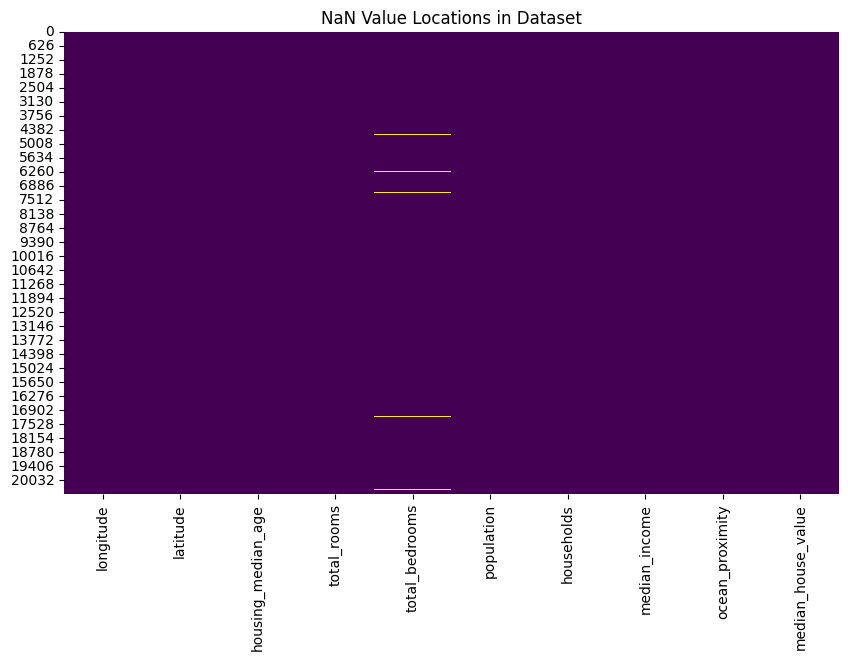

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(california_housing.isnull(), cmap="viridis", cbar=False)
plt.title("NaN Value Locations in Dataset")
plt.show()

**Encoding Categorical Data:**

The categorical column ocean_proximity is encoded using LabelEncoder to transform text labels into numerical labels, which are required for the regression model.

In [38]:
if 'ocean_proximity' in california_housing:
    label_encoder = LabelEncoder()
    california_housing['ocean_proximity'] = label_encoder.fit_transform(california_housing['ocean_proximity'])

**Extracting Features and Target:**

X holds all the features, while y represents the target variable (median_house_value).

In [39]:
X = california_housing.drop('median_house_value', axis=1)
y = california_housing['median_house_value']

**Splitting the Dataset:**

We split the dataset into 80% training and 20% testing to evaluate the model on unseen data.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardizing the Data:**

Standardization is applied to ensure that features are scaled, making the regression model's convergence more stable and faster.

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
california_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


**Performing Linear Regression:**

A linear regression model is trained on the training data. The model’s performance is evaluated by calculating the RMSE, a common metric to measure the prediction error for continuous variables.

In [47]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = reg_model.predict(X_test)
y_pred

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
reg_model.coef_

In [ ]:
reg_model.intercept_

**Calculate and print RMSE, MAE, and R²**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE) from Linear Regression:", rmse)
print("Mean Absolute Error (MAE) from Linear Regression:", mae)
print("R² Score from Linear Regression:", r2)

**Bonus Exercise: Linear Regression with one independent variable (median_income)**

In [ ]:
X_train_income = X_train[:, california_housing.columns.get_loc('median_income')]
X_test_income = X_test[:, california_housing.columns.get_loc('median_income')]

In [ ]:
# Reshape for compatibility with model
X_train_income = X_train_income.reshape(-1, 1)
X_test_income = X_test_income.reshape(-1, 1)

**Bonus: Linear Regression on Single Feature (median_income):**

We extract median_income as the single predictor for housing values.
The single-feature model is trained, predictions are made on test data, and RMSE is calculated.
We also visualize the fitted line against both training and testing datasets to see how median_income alone can predict housing prices.

In [ ]:
model_income = LinearRegression()
model_income.fit(X_train_income, y_train)

In [ ]:
y_predict_income = model_income.predict(X_test_income)
y_predict_income

**Calculate and print RMSE, MAE, and R² for single-feature model**

In [ ]:
rmse_income = np.sqrt(mean_squared_error(y_test, y_predict_income))
mae_income = mean_absolute_error(y_test, y_predict_income)
r2_income = r2_score(y_test, y_predict_income)

print("RMSE for single-feature (median_income) model:", rmse_income)
print("Mean Absolute Error for single-feature model:", mae_income)
print("R² Score for single-feature model:", r2_income)

In [ ]:
# Plot the regression line on training and test data
plt.figure(figsize=(12, 6))
plt.scatter(X_train_income, y_train, color="blue", label="Training data")
plt.plot(X_train_income, model_income.predict(X_train_income), color="red", label="Fitted line (training)")
plt.scatter(X_test_income, y_test, color="green", label="Test data")
plt.plot(X_test_income, y_predict_income, color="orange", label="Fitted line (test)")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Linear Regression based on Median Income")
plt.show()